In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [172]:
df = pd.read_csv("cardio_train.csv")

In [173]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [174]:
df.shape

(70000, 13)

In [175]:
pd.isnull(df).values.any(), pd.isnull(df).values.sum() 

(False, 0)

In [176]:
pd.isnull(df).sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [177]:
data = df.drop(["id"], axis=1)

In [178]:
data['age'] = data['age']/365

In [179]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [180]:
# checking and dropping duplicate values from DataFrame
data.duplicated().sum()

24

In [181]:
data.drop_duplicates(inplace=True)

In [182]:
data.shape

(69976, 12)

0    35004
1    34972
Name: cardio, dtype: int64

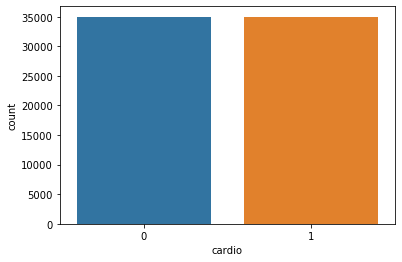

In [183]:
sns.countplot(data['cardio'])
data['cardio'].value_counts()

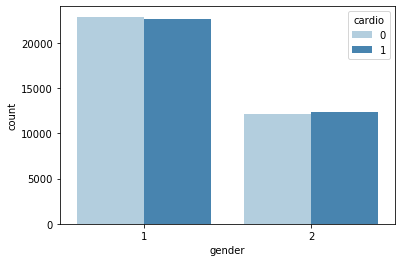

In [184]:
# visualizing samples by gender 1 = women, 2 = male
sns.countplot(x='gender', data=data, palette='Blues', hue='cardio')

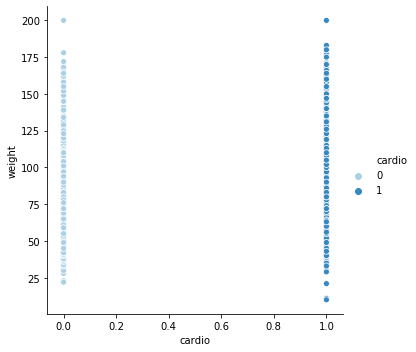

In [185]:
sns.relplot(x="cardio", y="weight", hue="cardio", palette="Blues", data=data)

In [186]:
# pos = 0
# neg = 0
# for i in data['weight']:
#     if i == 65:
#         neg += 1
#     if i == 1:
#         pos += 1

# print("Positive:", pos)
# print("Positive:", neg)

# count_weight = data.groupby(["weight", "cardio"]).size().reset_index(name="Count")
# count_weight.head(100)

In [202]:
X = data.drop(["cardio"], axis=1)
y = data["cardio"]

In [203]:
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50.391781,2,168,62.0,110,80,1,1,0,0,1
1,55.419178,1,156,85.0,140,90,3,1,0,0,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0
3,48.282192,2,169,82.0,150,100,1,1,0,0,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,52.712329,2,168,76.0,120,80,1,1,1,0,1
69996,61.920548,1,158,126.0,140,90,2,2,0,0,1
69997,52.235616,2,183,105.0,180,90,3,1,0,1,0
69998,61.454795,1,163,72.0,135,80,1,2,0,0,0


In [204]:
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 69976, dtype: int64

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [200]:
# standard scaling
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-0.43607396,  1.36382386,  0.44340245, ..., -0.31093759,
        -0.23842756,  0.49418302],
       [ 0.30763683, -0.73323251, -1.01802329, ..., -0.31093759,
        -0.23842756,  0.49418302],
       [-0.24801848, -0.73323251,  0.07804602, ..., -0.31093759,
        -0.23842756, -2.02354182],
       ...,
       [-0.16331245,  1.36382386,  2.27018462, ..., -0.31093759,
         4.19414601, -2.02354182],
       [ 1.20049506, -0.73323251, -0.16552494, ..., -0.31093759,
        -0.23842756, -2.02354182],
       [ 0.43408792, -0.73323251,  0.68697341, ..., -0.31093759,
        -0.23842756,  0.49418302]])

In [201]:
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50.391781,2,168,62.0,110,80,1,1,0,0,1
1,55.419178,1,156,85.0,140,90,3,1,0,0,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0
3,48.282192,2,169,82.0,150,100,1,1,0,0,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,52.712329,2,168,76.0,120,80,1,1,1,0,1
69996,61.920548,1,158,126.0,140,90,2,2,0,0,1
69997,52.235616,2,183,105.0,180,90,3,1,0,1,0
69998,61.454795,1,163,72.0,135,80,1,2,0,0,0


In [128]:
X.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50.391781,2,168,62.0,110,80,1,1,0,0,1
1,55.419178,1,156,85.0,140,90,3,1,0,0,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0
3,48.282192,2,169,82.0,150,100,1,1,0,0,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0


In [28]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

In [32]:
# feature correlation
data.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022763,-0.081546,0.053697,0.020765,0.017647,0.154432,0.098704,-0.047650,-0.029735,-0.009918,0.238189
gender,-0.022763,1.000000,0.499080,0.155320,0.005996,0.015241,-0.035915,-0.020558,0.338131,0.170950,0.005917,0.008037
height,-0.081546,0.499080,1.000000,0.290983,0.005488,0.006151,-0.050225,-0.018592,0.188003,0.094425,-0.006569,-0.010871
weight,0.053697,0.155320,0.290983,1.000000,0.030693,0.043695,0.141679,0.106790,0.067725,0.067071,-0.016863,0.181599
ap_hi,0.020765,0.005996,0.005488,0.030693,1.000000,0.016084,0.023768,0.011833,-0.000928,0.001403,-0.000031,0.054475
ap_lo,0.017647,0.015241,0.006151,0.043695,0.016084,1.000000,0.024004,0.010794,0.005177,0.010594,0.004784,0.065717
cholesterol,0.154432,-0.035915,-0.050225,0.141679,0.023768,0.024004,1.000000,0.451539,0.010298,0.035718,0.009927,0.221119
gluc,0.098704,-0.020558,-0.018592,0.106790,0.011833,0.010794,0.451539,1.000000,-0.004799,0.011214,-0.006761,0.089268
smoke,-0.047650,0.338131,0.188003,0.067725,-0.000928,0.005177,0.010298,-0.004799,1.000000,0.340077,0.025870,-0.015533
alco,-0.029735,0.170950,0.094425,0.067071,0.001403,0.010594,0.035718,0.011214,0.340077,1.000000,0.025486,-0.007366


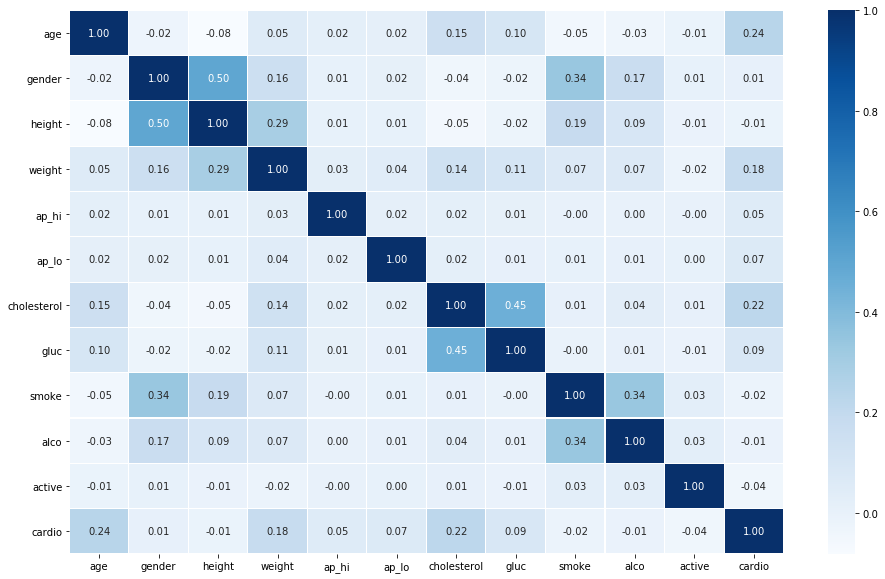

In [33]:
# plotting feature correlation
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=True, cmap="Blues",fmt='.2f', linewidths=.05)

In [14]:
# splitting into training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=100)

In [15]:
model = LinearRegression()

In [16]:
model.fit(X,y)

LinAlgError: SVD did not converge in Linear Least Squares

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# accuracy = metrics.accuracy_score(y_test, y_pred)
# print("Accuracy:{0}%".format(accuracy*100))

In [ ]:
# measure performance     
correctly_classified = 0
# counter     
count = 0    
for count in range( np.size( y_pred ) ) :   

    if y_test[count] == y_pred[count] :             
        correctly_classified = correctly_classified + 1

    count = count + 1

print( "Accuracy on test set by our model: ", (  correctly_classified / count ) * 100 ) 